In [18]:
import pandas as pd
import numpy as np
from pandas import read_csv
import datetime
from pandas import DataFrame

In [19]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

def parser(x):
    return datetime.datetime.strptime(x + '-0', "%Y-W%W-%w")
 


In [20]:
import os
os.chdir("C:\Work_NN\PythonDirectory\Juuls_Analysis")

In [22]:
from pandas.tools.plotting import autocorrelation_plot

C:\Users\nNaaz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\nNaaz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:            D.137328.74   No. Observations:                   24
Model:                 ARIMA(7, 1, 0)   Log Likelihood                -300.760
Method:                       css-mle   S.D. of innovations          66282.643
Date:                Tue, 03 Jul 2018   AIC                            619.520
Time:                        10:55:50   BIC                            630.123
Sample:                    04-22-2018   HQIC                           622.333
                         - 09-30-2018                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1936.1981    1.2e+04      0.161      0.874   -2.16e+04    2.54e+04
ar.L1.D.137328.74    -0.2804      0.206     -1.359      0.193      -0.685       0.124
ar.L2.D.137328.74    -0.

C:\Users\nNaaz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


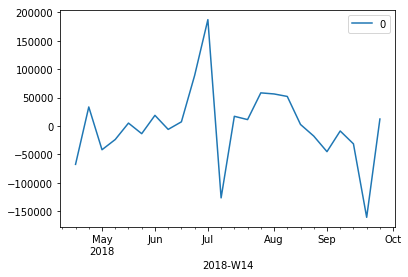

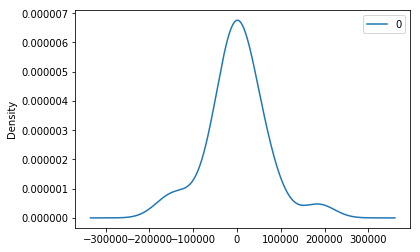

                   0
count      24.000000
mean      228.294428
std     68082.214858
min   -160743.437191
25%    -25777.303950
50%      3795.232062
75%     22309.551163
max    186977.775638


In [21]:
series = read_csv('juuls_sales_test1.csv', header=0, parse_dates=[1], index_col=1, squeeze=True, date_parser=parser)
# fit model
model = ARIMA(series, order=(7,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

C:\Users\nNaaz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


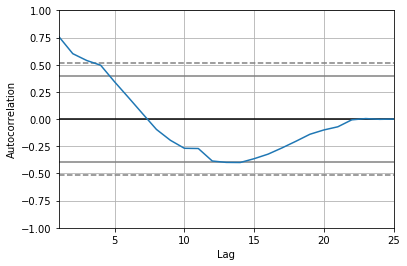

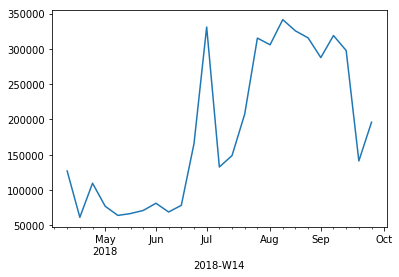

In [24]:
autocorrelation_plot(series)
pyplot.show()
series.plot()
pyplot.show()

In [26]:
from sklearn.metrics import mean_squared_error
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(3,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot


C:\Users\nNaaz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\nNaaz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\nNaaz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float)

predicted=240306.652961, expected=305710.310000
predicted=261753.425183, expected=341355.590000
predicted=321758.096194, expected=325438.290000
predicted=351945.549536, expected=315444.060000
predicted=341773.572272, expected=287534.070000
predicted=332384.609897, expected=318794.410000
predicted=343154.662751, expected=297568.870000
predicted=324648.022819, expected=140956.100000
predicted=200553.739169, expected=195904.170000
Test MSE: 5658785356.169


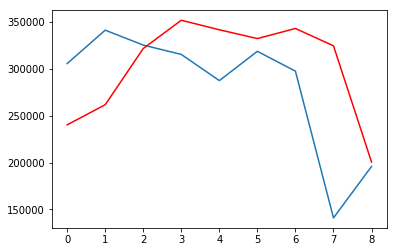

In [27]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

C:\Users\nNaaz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


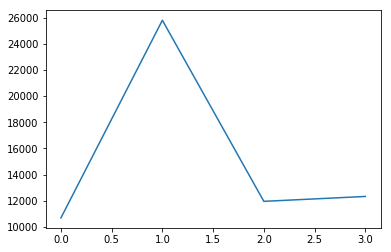

In [37]:
output1 = model_fit.predict(20)
pyplot.plot(output1)
pyplot.show()